In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from matplotlib.colors import LogNorm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_parquet(os.path.join("..", "..", "data", "input", "raw", "01.parquet"))

In [3]:
df

,trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,fare,tips,tolls,extras,...,pickup_community_area,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_community_area,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,dropoff_census_tract,company
0,eda829a425ca1da13e1130c700c876881e26ff9a,b47c583b142d75b42882975eaab19c6cb98d8268601657...,2013-01-01T00:00:00.000,2013-01-01T00:15:00.000,600,3,9.65,0.00,0.00,0.00,...,None,None,None,None,None,None,None,None,None,None
1,0c2b3705c9748a5949bf5b7d727b2d1f2e18805f,c2280976049b22e58ce53a17263114616be76981b9ac56...,2013-01-01T00:00:00.000,2013-01-01T00:30:00.000,1320,12.3,26.25,0.00,0.00,0.00,...,None,None,None,None,None,None,None,None,None,None
2,c15dc571c96c36e44bc4ed50f40330e9f0a21650,294ae9e2f433bb460731f9199b1837de3cf88ad987a42b...,2013-01-01T00:00:00.000,2013-01-01T00:30:00.000,1320,6.3,16.45,1.00,0.00,2.00,...,None,None,None,None,None,None,None,None,None,None
3,3c979de8d901f317228a40673c3923d72104b92c,2db2ec3555e44930a5d41596cb7935af41c30c30381672...,2013-01-01T00:00:00.000,2013-01-01T01:30:00.000,5520,88.8,164.25,63.56,0.00,90.00,...,6,41.94258518,-87.656644092,"{'coordinates': [-87.6566440918, 41.9425851797...",None,None,None,None,None,None
4,27ad87f629bf14fa3cb894daad514cdad4736f9c,4b38941e0745acdeefe630832a438a59fdaac78640f68a...,2013-01-01T00:00:00.000,2013-01-01T00:15:00.000,900,2.7,10.45,0.00,0.00,1.00,...,28,41.874005383,-87.66351755,"{'coordinates': [-87.6635175498, 41.874005383]...",8,41.899602111,-87.633308037,"{'coordinates': [-87.6333080367, 41.899602111]...",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590624,e75fec15d164cf72e376b605c42d261f4047331e,2ee014517008727c09c564f78b483383c62d85e7d5f0f8...,2013-02-01T00:00:00.000,2013-01-31T23:45:00.000,None,0,27.65,10.00,0.00,0.00,...,None,None,None,None,None,None,None,None,None,Taxi Affiliation Services
1590625,603f1d5956afef91ca762f69ac0ef3059e987f47,2189763857bd03c5d470eb4f23d87e1a85efcc0a3a76eb...,2013-02-01T00:00:00.000,2013-02-01T00:00:00.000,0,0,39.25,6.00,0.00,0.00,...,None,None,None,None,None,None,None,None,None,Taxi Affiliation Services
1590626,1736c6288132d70d6158ec6d5a6b08b4d41a0339,e0bbc5ebabf1a48bc6b8dd0734576d956effcda6dd4388...,2013-02-01T00:00:00.000,2013-01-31T23:45:00.000,None,0,9.25,3.00,0.00,0.00,...,None,None,None,None,None,None,None,None,None,Taxi Affiliation Services
1590627,53df0a6d6db1780f933766274b8f44d8a1be9c0b,c8a6bf06c8c876d9b39866d7bc6ebd853115316b331716...,2013-02-01T00:00:00.000,2013-01-31T23:45:00.000,None,0,18.00,0.00,0.00,0.00,...,None,None,None,None,None,None,None,None,None,Taxi Affiliation Services


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590629 entries, 0 to 1590628
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   trip_id                     1590629 non-null  object
 1   taxi_id                     1590629 non-null  object
 2   trip_start_timestamp        1590629 non-null  object
 3   trip_end_timestamp          1590629 non-null  object
 4   trip_seconds                1559325 non-null  object
 5   trip_miles                  1590581 non-null  object
 6   fare                        1590628 non-null  object
 7   tips                        1590628 non-null  object
 8   tolls                       1590627 non-null  object
 9   extras                      1590628 non-null  object
 10  trip_total                  1590628 non-null  object
 11  payment_type                1590629 non-null  object
 12  pickup_census_tract         905174 non-null   object
 13  pickup_commu

In [5]:
trip_data = df.drop(columns=["trip_id", "taxi_id", "company", "payment_type",
                             "trip_start_timestamp", "trip_end_timestamp", 
                             "pickup_census_tract", "pickup_centroid_location", 
                             "dropoff_census_tract", "dropoff_centroid_location"])

In [6]:
trip_data["trip_start_hour"] = pd.to_datetime(df["trip_start_timestamp"]).dt.hour

In [7]:
print("With NaN", len(trip_data))
trip_data.dropna(inplace=True)
print("NaN dropped", len(trip_data))

With NaN 1590629
NaN dropped 1261582


In [8]:
trip_data

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_community_area,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,dropoff_centroid_latitude,dropoff_centroid_longitude,trip_start_hour
4,900,2.7,10.45,0.00,0.00,1.00,11.45,28,41.874005383,-87.66351755,8,41.899602111,-87.633308037,0
9,60,0.3,3.85,0.00,0.00,0.00,3.85,32,41.870607372,-87.622172937,32,41.870607372,-87.622172937,0
19,240,0.4,4.84,0.00,0.00,0.00,4.84,7,41.928967266,-87.656156831,7,41.929046937,-87.651310877,0
48,600,0,7.25,0.00,0.00,0.00,7.25,7,41.929046937,-87.651310877,6,41.942577185,-87.647078509,0
49,720,0,15.25,0.00,0.00,0.00,15.25,8,41.89503345,-87.619710672,3,41.972929317,-87.650290074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590611,0,0.05,3.25,0.00,0.00,1.00,4.25,3,41.96581197,-87.655878786,3,41.96581197,-87.655878786,0
1590614,420,5.2,13.05,0.00,0.00,0.00,13.05,15,41.954027649,-87.763399032,22,41.92276062,-87.699155343,0
1590616,360,0.7,5.45,0.00,0.00,0.00,5.45,8,41.892072635,-87.628874157,32,41.880994471,-87.632746489,0
1590617,240,1.4,5.85,3.00,0.00,0.00,8.85,7,41.922686284,-87.649488729,6,41.944226601,-87.655998182,0


In [9]:
trip_data = trip_data.apply(pd.to_numeric)

In [10]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261582 entries, 4 to 1590618
Data columns (total 14 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   trip_seconds                1261582 non-null  int64  
 1   trip_miles                  1261582 non-null  float64
 2   fare                        1261582 non-null  float64
 3   tips                        1261582 non-null  float64
 4   tolls                       1261582 non-null  float64
 5   extras                      1261582 non-null  float64
 6   trip_total                  1261582 non-null  float64
 7   pickup_community_area       1261582 non-null  int64  
 8   pickup_centroid_latitude    1261582 non-null  float64
 9   pickup_centroid_longitude   1261582 non-null  float64
 10  dropoff_community_area      1261582 non-null  int64  
 11  dropoff_centroid_latitude   1261582 non-null  float64
 12  dropoff_centroid_longitude  1261582 non-null  float64
 1

In [11]:
len(trip_data["pickup_centroid_latitude"].unique())

381

In [12]:
len(trip_data["pickup_centroid_longitude"].unique())

381

In [13]:
trip_data = trip_data.sample(1000, random_state=42)

In [14]:
trip_data

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pickup_community_area,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,dropoff_centroid_latitude,dropoff_centroid_longitude,trip_start_hour
923146,300,1.1,5.65,0.0,0.0,1.0,6.65,6,41.945282,-87.661545,6,41.949829,-87.643965,23
1401451,600,0.1,9.05,0.0,0.0,1.0,10.05,32,41.878866,-87.625192,34,41.842076,-87.633973,12
282478,360,1.2,6.05,0.0,0.0,0.0,6.05,32,41.884987,-87.620993,8,41.895033,-87.619711,10
460977,300,0.0,5.05,0.0,0.0,0.0,5.05,8,41.892508,-87.626215,32,41.880994,-87.632746,13
1066979,660,0.0,9.05,0.0,0.0,1.0,10.05,22,41.922761,-87.699155,24,41.901207,-87.676356,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767315,600,2.0,8.25,0.0,0.0,1.0,9.25,32,41.880994,-87.632746,33,41.859350,-87.617358,15
258645,180,0.7,4.45,0.0,0.0,0.0,4.45,8,41.907520,-87.626659,8,41.898332,-87.620763,16
215837,300,0.0,5.45,2.0,0.0,0.0,7.45,6,41.936310,-87.651563,7,41.929047,-87.651311,19
1361633,6420,10.8,49.45,0.0,0.0,0.0,49.45,14,41.968069,-87.721559,76,41.980264,-87.913625,13


In [15]:
trip_data.to_numpy()[:,8]

array([41.94528233, 41.87886558, 41.88498719, 41.89250778, 41.92276062,
       41.89321636, 41.87740612, 41.89960211, 41.88498719, 41.78599852,
       41.92187746, 41.89092203, 41.87925508, 41.92268628, 41.90120699,
       41.89092203, 41.89250778, 41.8789145 , 41.89960211, 41.89960211,
       41.88099447, 41.87925508, 41.92268628, 41.92177819, 41.80891628,
       41.968069  , 41.92896727, 41.9442266 , 41.89204214, 41.94269184,
       41.94142248, 41.9386662 , 41.90749193, 41.98026431, 41.85934972,
       41.88530002, 41.9442266 , 41.87886558, 41.88498719, 41.90602597,
       41.88099447, 41.87886558, 41.92268628, 41.95358212, 41.76157791,
       41.88099447, 41.89960211, 41.87740612, 41.89197151, 41.9442266 ,
       41.89833179, 41.9442266 , 41.89833179, 41.88099447, 41.92896727,
       41.87060737, 41.88099447, 41.87060737, 41.87060737, 41.89207263,
       41.89830587, 41.88099447, 41.92926299, 41.88099447, 41.94629454,
       41.89833179, 41.88498719, 41.89960211, 41.89915561, 41.87

In [16]:
trip_data.to_numpy()[:,9]

array([-87.6615451 , -87.62519214, -87.62099291, -87.62621491,
       -87.69915534, -87.63784421, -87.62197165, -87.63330804,
       -87.62099291, -87.75093429, -87.66407824, -87.61886836,
       -87.642649  , -87.64948873, -87.67635599, -87.61886836,
       -87.62621491, -87.70589713, -87.63330804, -87.63330804,
       -87.63274649, -87.642649  , -87.64948873, -87.65106188,
       -87.59618334, -87.72155906, -87.65615683, -87.65599818,
       -87.63186395, -87.65177051, -87.67595393, -87.71121059,
       -87.63576009, -87.9136246 , -87.61735801, -87.64280847,
       -87.65599818, -87.62519214, -87.62099291, -87.67531162,
       -87.63274649, -87.62519214, -87.64948873, -87.72345239,
       -87.57278199, -87.63274649, -87.63330804, -87.62197165,
       -87.61294541, -87.65599818, -87.62076287, -87.65599818,
       -87.62076287, -87.63274649, -87.65615683, -87.62217294,
       -87.63274649, -87.62217294, -87.62217294, -87.62887416,
       -87.65361398, -87.63274649, -87.63589095, -87.63

In [17]:
scaler = StandardScaler().fit(trip_data)
trip_data_scaled = scaler.transform(trip_data)

## KMeans (hard-clustering)

In [18]:
# normalisierung fehlt, random_state immer setzen!

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(trip_data_scaled)

In [20]:
labels = kmeans.predict(trip_data_scaled)

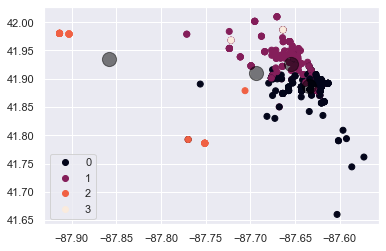

In [21]:
scatter_kmeans = plt.scatter(trip_data.to_numpy()[:,9], trip_data.to_numpy()[:,8], c=labels)
plt.legend(handles=scatter_kmeans.legend_elements()[0], labels=["0", "1", "2", "3"], loc="lower left")

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 9], centers[:, 8], c='black', s=200, alpha=0.5)
plt.show()

## Gaussian Mixure Model (soft-clustering)

In [22]:
gmm = GaussianMixture(n_components=4, random_state=42).fit(trip_data_scaled)

In [23]:
labels2 = gmm.predict(trip_data_scaled)

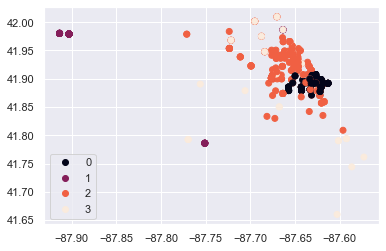

In [24]:
scatter_gmm = plt.scatter(trip_data.to_numpy()[:,9], trip_data.to_numpy()[:,8], c=labels2)
plt.legend(handles=scatter_gmm.legend_elements()[0], labels=["0", "1", "2", "3"], loc="lower left")
plt.show()

## Clustering results

In [25]:
labels = kmeans.predict(trip_data_scaled)

In [26]:
kmeans_p = trip_data
kmeans_p["cluster"] = labels

In [27]:
kmeans_p.columns

Index(['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'pickup_community_area', 'pickup_centroid_latitude',
       'pickup_centroid_longitude', 'dropoff_community_area',
       'dropoff_centroid_latitude', 'dropoff_centroid_longitude',
       'trip_start_hour', 'cluster'],
      dtype='object')

In [28]:
kmeans_cluster = kmeans_p.groupby("cluster").mean()[["trip_seconds", "trip_miles", "fare", "tips", "tolls", "extras", "trip_total"]]
kmeans_cluster["trip_start_hour"] = kmeans_p.groupby("cluster").agg(lambda x:x.value_counts().index[0])["trip_start_hour"]
kmeans_cluster["count"] = kmeans_p.groupby("cluster").size()
kmeans_cluster

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,trip_start_hour,count
cluster,,,,,,,,,
0,456.329331,1.520343,7.414957,0.320789,0.0,0.368782,8.104528,18,583
1,583.058824,3.506382,9.485088,0.633647,0.0,0.513235,10.631971,2,340
2,1744.000000,15.760000,33.209778,3.333556,0.0,2.133333,38.676667,15,45
3,1651.875000,15.175000,32.804062,2.801875,0.0,2.296875,37.902813,8,32


In [29]:
labels2 = gmm.predict(trip_data_scaled)

In [30]:
gmm_p = trip_data
gmm_p["cluster"] = labels2

In [31]:
gmm_cluster = gmm_p.groupby("cluster").mean()[["trip_seconds", "trip_miles", "fare", "tips", "tolls", "extras", "trip_total"]]
gmm_cluster["trip_start_hour"] = gmm_p.groupby("cluster").agg(lambda x:x.value_counts().index[0])["trip_start_hour"]
gmm_cluster["count"] = gmm_p.groupby("cluster").size()
gmm_cluster

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,trip_start_hour,count
cluster,,,,,,,,,
0,364.105263,0.516500,5.972316,0.222658,0.0,0.376316,6.571289,13,380
1,1408.301887,8.186792,29.007358,2.962453,0.0,2.132075,34.101887,15,53
2,545.908096,1.439453,8.826105,0.520000,0.0,0.443107,9.789212,19,457
3,1210.363636,18.048455,20.469273,1.480636,0.0,0.913636,22.863545,1,110


### Clustering on spatial level

In [32]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    # Plot the Gaussian Mixture Model
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

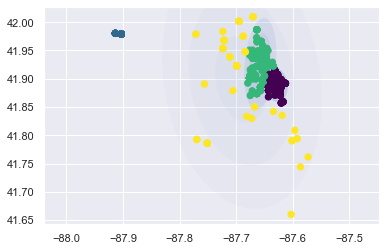

In [33]:
gmm = GaussianMixture(n_components=4, random_state=42)

data = trip_data[["pickup_centroid_longitude", "pickup_centroid_latitude"]]
plot_gmm(gmm, data.to_numpy())

## Spatial Kernel Density Estimation

In [34]:
trip_data = trip_data[["pickup_centroid_longitude", "pickup_centroid_latitude"]]

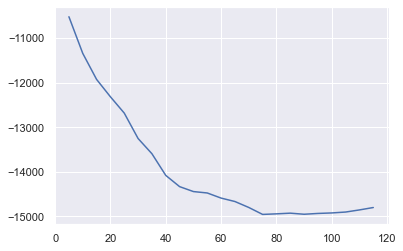

In [35]:
n_components = np.arange(5, 120, 5)
models = [GaussianMixture(n, random_state=42) for n in n_components]
aics = [model.fit(trip_data).aic(trip_data) for model in models]
plt.plot(n_components, aics);

In [36]:
n = 75

In [37]:
gmm = GaussianMixture(n, random_state=42)
gmm.fit(trip_data)
print(gmm.converged_)

True


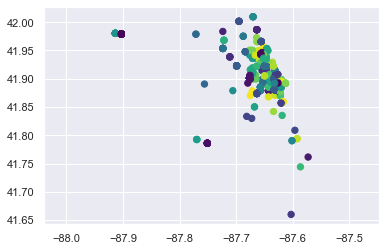

In [38]:
plot_gmm(gmm, trip_data.to_numpy())

<ipython-input-39-86a1b8133fc4>:14: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),


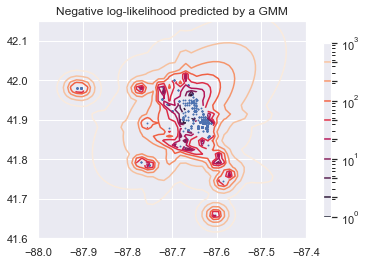

In [39]:
# Source https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html

clf = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
clf.fit(trip_data)

# display predicted scores by the model as a contour plot
x = np.linspace(-88., -87.4)
y = np.linspace(41.6, 42.15)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8)
plt.scatter(trip_data.to_numpy()[:, 0], trip_data.to_numpy()[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()